In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from arch import arch_model

import matplotlib.pyplot as plt

os.getcwd()

'F:\\Course\\6.SamsungElectronics\\Research\\Managing Bubble Risks in Housing Market A Real Option Approach\\Code'

Location of files : 
 F:\Course\6.SamsungElectronics\Research\Managing Bubble Risks in Housing Market A Real Option Approach\Data\20180324_Raw_Return.csv

Time          datetime64[ns]
HPP                  float64
CDP                  float64
IR                   float64
HPP_Return           float64
CDP_Return           float64
IR_Return            float64
dtype: object


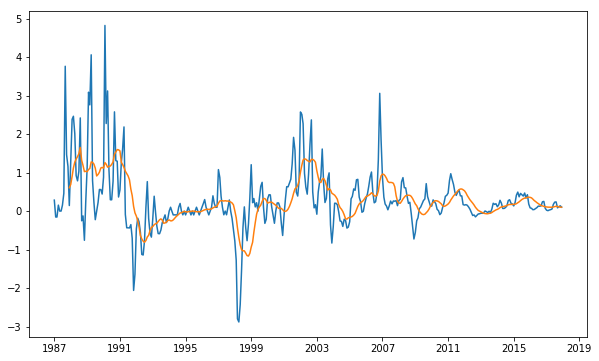


Stationarity of raw(%) :  0.9885174133036216

Autocorrelation of raw(%, 2 is no autocorr.) :  0.5015280616467561

Optimal lags for hedging autocorrelation of raw :  1

Autocorrelation after ARIMA(%, 2 is no autocorr.) :  1.980550782185877

SARIMAX for the cross-check : ...


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                           Statespace Model Results                           
Dep. Variable:             HPP_Return   No. Observations:                  372
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -316.073
Date:                Fri, 04 May 2018   AIC                            638.146
Time:                        22:39:29   BIC                            649.903
Sample:                    01-01-1987   HQIC                           642.815
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7293      0.033     22.242      0.000       0.665       0.794
ma.L1          0.0464      0.050      0.924      0.355      -0.052       0.145
sigma2         0.3232      0.009     37.697      0.0

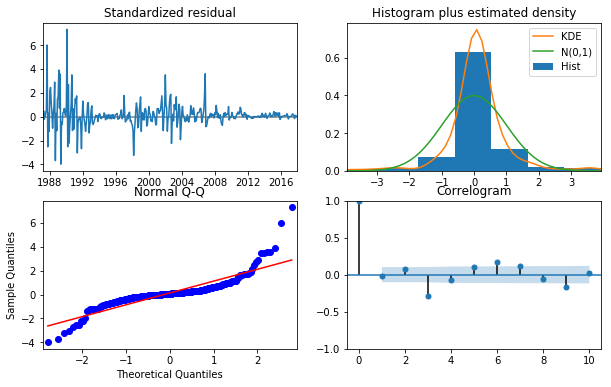


Check for the result using plot of ACF and PACF : 
(Raw Using / Residuals after ARIMA / Residuals**2 after ARIMA)


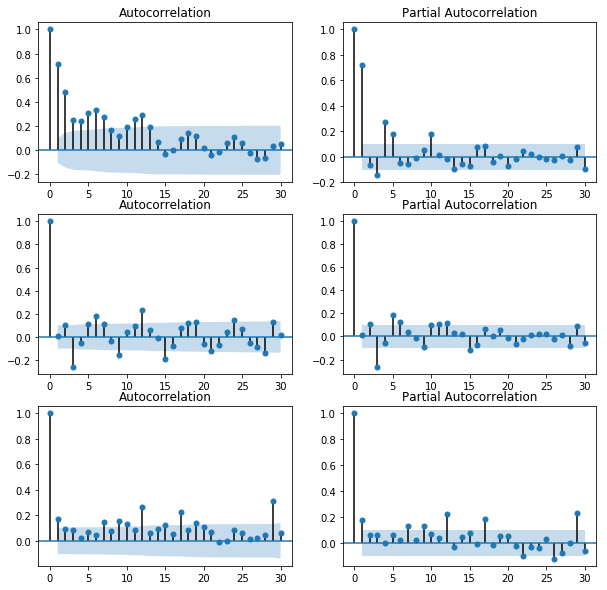


Extracting a conditional volatility : ..

Iteration:      1,   Func. Count:      7,   Neg. LLF: 127.77410029817258
Iteration:      2,   Func. Count:     20,   Neg. LLF: 122.30430362944415
Iteration:      3,   Func. Count:     29,   Neg. LLF: 120.63887829111984
Iteration:      4,   Func. Count:     37,   Neg. LLF: 106.05009970463053
Iteration:      5,   Func. Count:     44,   Neg. LLF: 93.51976817984861
Iteration:      6,   Func. Count:     54,   Neg. LLF: 92.74173149607026
Iteration:      7,   Func. Count:     62,   Neg. LLF: 87.35277343558234
Iteration:      8,   Func. Count:     71,   Neg. LLF: 87.17071206334046
Iteration:      9,   Func. Count:     81,   Neg. LLF: 85.04860137767002
Iteration:     10,   Func. Count:     88,   Neg. LLF: 81.04337312367068
Iteration:     11,   Func. Count:     95,   Neg. LLF: 80.71581204050268
Iteration:     12,   Func. Count:    103,   Neg. LLF: 80.69959948223114
Iteration:     13,   Func. Count:    110,   Neg. LLF: 80.68336391552474
Iteration:     14

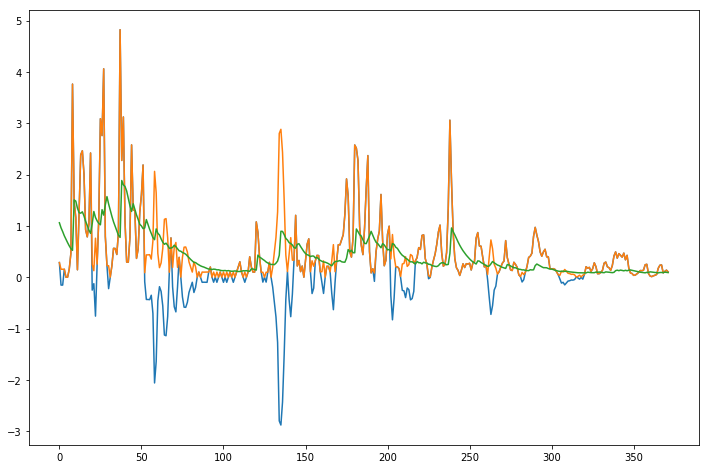


File out for conditional volatility : ..


In [3]:
path_data = 'F:\\Course\\6.SamsungElectronics\\Research\\Managing Bubble Risks in Housing Market A Real Option Approach\\Data'
files = glob.glob(path_data + '\\20180324_Raw_Return.csv')
print('Location of files : \n', files[0])

raw = pd.read_csv(files[0], header=0)
raw['Time'] = pd.to_datetime(raw.Time, format='%Y-%m-%d')
raw.set_index(raw['Time'], inplace=True)
print()
print(raw.dtypes)

raw_using = raw['HPP_Return']
plt.figure(figsize=(10,6))
plt.plot(raw_using)
plt.plot(raw_using.rolling(window=12, center=False).mean())
plt.show()
plt.close()

print('\nStationarity of raw(%) : ', 1-adfuller(raw_using, autolag='AIC')[1])
print('\nAutocorrelation of raw(%, 2 is no autocorr.) : ', sm.stats.durbin_watson(raw_using))

pp = 1
oo = 0
qq = 1
hr_arima = sm.tsa.ARIMA(raw_using, order=(pp,oo,qq)).fit(disp=-1)
sl = 0.01
print('\nOptimal lags for hedging autocorrelation of raw : ', np.argwhere(hr_arima.summary2().tables[1]['P>|t|'] < sl).max())
print('\nAutocorrelation after ARIMA(%, 2 is no autocorr.) : ', sm.stats.durbin_watson(hr_arima.resid.values))

print('\nSARIMAX for the cross-check : ...')
hr_sarimax = sm.tsa.statespace.SARIMAX(raw_using,
                                      order=(pp,oo,qq),
                                      seasonal_order=(0,0,0,0),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False).fit()
print(hr_sarimax.summary())
print(hr_sarimax.plot_diagnostics(figsize=(10,6)))
plt.show()
plt.close()

print('\nCheck for the result using plot of ACF and PACF : ')
print('(Raw Using / Residuals after ARIMA / Residuals**2 after ARIMA)')
flg = plt.figure(figsize=(10,10))
flg = sm.graphics.tsa.plot_acf(raw_using, lags = 30, ax=flg.add_subplot(321))
flg = sm.graphics.tsa.plot_pacf(raw_using, lags = 30, ax=flg.add_subplot(322))
flg = sm.graphics.tsa.plot_acf(hr_arima.resid.values, lags = 30, ax=flg.add_subplot(323))
flg = sm.graphics.tsa.plot_pacf(hr_arima.resid.values, lags = 30, ax=flg.add_subplot(324))
flg = sm.graphics.tsa.plot_acf(hr_arima.resid.values**2, lags = 30, ax=flg.add_subplot(325))
flg = sm.graphics.tsa.plot_pacf(hr_arima.resid.values**2, lags = 30, ax=flg.add_subplot(326))
plt.show()
plt.close()

print('\nExtracting a conditional volatility : ..\n')
hr_garch = arch_model(hr_arima.resid.values, vol='Garch', p=1, o=0, q=1, dist='generalized error').fit()
print(hr_garch.summary())

plt.figure(figsize=(12,8))
plt.plot(list(raw_using))
plt.plot(np.abs(list(raw_using)))
plt.plot(list(hr_garch.conditional_volatility))
plt.show()
plt.close()

print('\nFile out for conditional volatility : ..')
abspath_out = 'F:\\Course\\6.SamsungElectronics\\Research\\Managing Bubble Risks in Housing Market A Real Option Approach\\Data\\'
filename_out = '20180325_Raw_Volatility.csv'
raw_volatility = pd.Series(hr_garch.conditional_volatility, index=raw_using.index, name='HPP_CondiVol')
raw_volatility.to_csv(abspath_out+filename_out, sep=',', header=True)